In [1]:
from pyiron import Project, ase_to_pyiron
import matplotlib.pyplot as plt
import numpy as np
from pyiron import Project
from ase.io import read, write
from pyiron import ase_to_pyiron
import ase
import os
import time
from ase import neighborlist
from ase.data import covalent_radii 
from ase.calculators.neighborlist import NeighborList
from ase.neighborlist import neighbor_list
from ase.io import read, write 
from ase import Atoms 
from scipy import sparse
import numpy as np 
from ase.io.pov import get_bondpairs 
import time
import lammps_logfile

/nfshome/deshmukh/.local/lib/python3.9/site-packages/ase/calculators/neighborlist.py:5: UserWarning: Moved to ase.neighborlist
  warnings.warn('Moved to ase.neighborlist')


In [2]:
# Ordered 
q_1 = lammps_logfile.File("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_ordered_glass/boilot_443K_2_05_amo_s_1_1_rate_1_k_ps_hdf5/boilot_443K_2_05_amo_s_1_1_rate_1_k_ps/log.lammps")
# Random 
q_1_2 = lammps_logfile.File("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_proto_glass/boilot_443K_2_05_amo_s_3_rate_1_k_ps_hdf5/boilot_443K_2_05_amo_s_3_rate_1_k_ps/log.lammps")

# Ordered
q_c = lammps_logfile.File("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_ordered_glass/boilot_443K_2_05_cryt_s_1_k_ps_hdf5/boilot_443K_2_05_cryt_s_1_k_ps/log.lammps")

# Random 
q_c_2 = lammps_logfile.File("/nfshome/deshmukh/pyiron/projects/NASICON/project/padone_pot/new_proto_glass/boilot_443K_2_05_cryt_s_3_k_ps_hdf5/boilot_443K_2_05_cryt_s_3_k_ps/log.lammps")

u = q_1.get('Step', run_num=3)
v = q_1.get('Temp', run_num=3)
w = q_1.get('PotEng', run_num=3)
x = q_1.get('TotEng', run_num=3)
y = q_1.get('Volume', run_num=3)
z = q_1.get('Density', run_num=3)

u_2 = q_1_2.get('Step', run_num=5)
v_2 = q_1_2.get('Temp', run_num=5)
w_2 = q_1_2.get('PotEng', run_num=5)
x_2 = q_1_2.get('TotEng', run_num=5)
y_2 = q_1_2.get('Volume', run_num=4)
z_2 = q_1_2.get('Density', run_num=4)

u_c = q_c.get('Step', run_num=4)
v_c = q_c.get('Temp', run_num=4)
w_c = q_c.get('PotEng', run_num=4)
x_c = q_c.get('TotEng', run_num=4)
y_c = q_c.get('Volume', run_num=3)
z_c = q_c.get('Density', run_num=3)

u_c_1 = q_c_2.get('Step', run_num=4)
v_c_1 = q_c_2.get('Temp', run_num=4)
w_c_1 = q_c_2.get('PotEng', run_num=4)
x_c_1 = q_c_2.get('TotEng', run_num=4)
y_c_1 = q_c_2.get('Volume', run_num=3)
z_c_1 = q_c_2.get('Density', run_num=3)

u_1 = q_1.get('Step', run_num=5)
v_1 = q_1.get('Temp', run_num=5)
w_1 = q_1.get('PotEng', run_num=5)
x_1 = q_1.get('TotEng', run_num=5)
y_1 = q_1.get('Volume', run_num=4)
z_1 = q_1.get('Density', run_num=4)

In [3]:
# Glass density 
density_o = np.mean(z_1)
density_r = np.mean(z_2)
density_o_e = np.std(z_1)
density_r_e = np.std(z_2)
print('Density of ordered glass is {} (g/cm3) and random glass is {} (g/cm3)'.format(density_o,density_r))
print('Error in density of ordered glass is {} (g/cm3) and random glass is {} (g/cm3)'.format(density_o_e,density_r_e))

Density of ordered glass is 3.321328172310143 (g/cm3) and random glass is 3.3252116196180412 (g/cm3)
Error in density of ordered glass is 0.006993224306554614 (g/cm3) and random glass is 0.00659353828494636 (g/cm3)


In [4]:
# Crystal density
density_c_o = np.mean(z_c)
density_c_r = np.mean(z_c_1)
density_c_o_e = np.std(z_c)
density_c_r_e = np.std(z_c_1)
print('Density of ordered crystal is {} (g/cm3) and random crystal is {} (g/cm3)'.format(density_c_o,density_c_r))
print('Error in density of ordered crystal is {} (g/cm3) and random crystal is {} (g/cm3)'.format(density_c_o_e,density_c_r_e))

Density of ordered crystal is 3.1921919372467253 (g/cm3) and random crystal is 3.1918077676343506 (g/cm3)
Error in density of ordered crystal is 0.006051019604387557 (g/cm3) and random crystal is 0.005385288836926511 (g/cm3)


In [5]:
# Potetial energy per atom glass vs crystal
pot_o = np.mean(w_1/1080)
pot_r = np.mean(w_2/1080)
pot_o_e = np.std(w_1/1080)
pot_r_e = np.std(w_2/1080)
print('Potential energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(pot_o,pot_r))
print('Error in potential energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(pot_o_e,pot_r_e))

pot_c_o = np.mean(w_c/1080)
pot_o_r = np.mean(w_c_1/1080)
pot_c_o_e = np.std(w_c/1080)
pot_c_o_r_e = np.std(w_c_1/1080)
print('Potential energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(pot_c_o,pot_o_r))
print('Error in potential energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(pot_c_o_e,pot_c_o_r_e))

Potential energy per atom of ordered glass is -14.832477620818588 (eV) and random glass is -14.843874340081443 (eV)
Error in potential energy per atom of ordered glass is 0.0009665491746234148 (eV) and random glass is 0.000863735096581346 (eV)
Potential energy per atom of ordered crystal is -14.940150207389843 (eV) and random crystal is -14.942624793741729 (eV)
Error in potential energy per atom of ordered crystal is 0.0011153482968240629 (eV) and random crystal is 0.0010468333752997007 (eV)


In [6]:
# Average total energy per atom glass vs crystal
tot_o = np.mean(x_1/1080)
tot_r = np.mean(x_2/1080)
tot_o_e = np.std(x_1/1080)
tot_r_e = np.std(x_2/1080)
print('Total energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(tot_o,tot_r))
print('Error in total energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(tot_o_e,tot_r_e))
tot_o_c = np.mean(x_c/1080)
tot_r_c = np.mean(x_c_1/1080)
tot_o_c_e = np.std(x_c/1080)
tot_r_c_e = np.std(x_c_1/1080)
print('Total energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(tot_o_c,tot_r_c))
print('Error in total energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(tot_o_c_e,tot_r_c_e))


Total energy per atom of ordered glass is -14.793927209899048 (eV) and random glass is -14.804776301784564 (eV)
Error in total energy per atom of ordered glass is 0.0012071438123163563 (eV) and random glass is 0.001257408222471038 (eV)
Total energy per atom of ordered crystal is -14.90156151326108 (eV) and random crystal is -14.903807789994842 (eV)
Error in total energy per atom of ordered crystal is 0.001276103600393752 (eV) and random crystal is 0.0016244703160245304 (eV)


In [7]:
# Average kinetic energy per atom glass vs crystal
kin_o = np.mean(tot_o-pot_o)
kin_r = np.mean(tot_r-pot_r)
kin_o_e = np.std(tot_o-pot_o)
kin_r_e = np.std(tot_r-pot_r)
print('Kinetic energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(kin_o,kin_r))
print('Error in kinetic energy per atom of ordered glass is {} (eV) and random glass is {} (eV)'.format(kin_o_e,kin_r_e))
kin_o_c = np.mean(tot_o_c-pot_c_o)
kin_r_c = np.mean(tot_r_c-pot_o_r)
kin_o_c_e = np.std(tot_o_c-pot_c_o)
kin_r_c_e = np.std(tot_r_c-pot_o_r)
print('Kinetic energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(kin_o_c,kin_r_c))
print('Error in kinetic energy per atom of ordered crystal is {} (eV) and random crystal is {} (eV)'.format(kin_o_c_e,kin_r_c_e))
print('Average kinetic energy per atom of at room temerature {} (eV)'.format(3/2*8.617e-5*300))

Kinetic energy per atom of ordered glass is 0.03855041091954092 (eV) and random glass is 0.03909803829687952 (eV)
Error in kinetic energy per atom of ordered glass is 0.0 (eV) and random glass is 0.0 (eV)
Kinetic energy per atom of ordered crystal is 0.03858869412876231 (eV) and random crystal is 0.038817003746887124 (eV)
Error in kinetic energy per atom of ordered crystal is 0.0 (eV) and random crystal is 0.0 (eV)
Average kinetic energy per atom of at room temerature 0.0387765 (eV)


In [8]:
# Average volume per atom glass vs crystal
vol_o = np.mean(y_1)
vol_r = np.mean(y_2)
vol_o_e = np.std(y_1)
vol_r_e = np.std(y_2)
print('Volume per atom of ordered glass is {} (A^3) and random glass is {} (A^3)'.format(vol_o,vol_r))
print('Error in volume per atom of ordered glass is {} (A^3) and random glass is {} (A^3)'.format(vol_o_e,vol_r_e))
vol_o_c = np.mean(y_c)
vol_r_c = np.mean(y_c_1)
vol_o_c_e = np.std(y_c)
vol_r_c_e = np.std(y_c_1)
print('Volume per atom of ordered crystal is {} (A^3) and random crystal is {} (A^3)'.format(vol_o_c,vol_r_c))
print('Error in volume per atom of ordered crystal is {} (A^3) and random crystal is {} (A^3)'.format(vol_o_c_e,vol_r_c_e))


Volume per atom of ordered glass is 14323.965328331898 (A^3) and random glass is 14307.229475843518 (A^3)
Error in volume per atom of ordered glass is 30.167887469873353 (A^3) and random glass is 28.373813751347345 (A^3)
Volume per atom of ordered crystal is 14903.4113256145 (A^3) and random crystal is 14905.193986772249 (A^3)
Error in volume per atom of ordered crystal is 28.23613099239527 (A^3) and random crystal is 25.12979222430457 (A^3)


1818.7589957387206


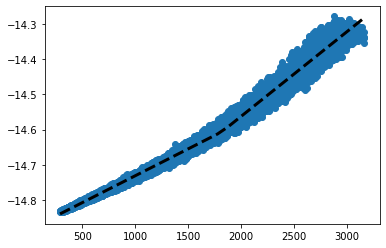

In [9]:
import pwlf
my_pwlf = pwlf.PiecewiseLinFit(v, w/1080)
breaks = my_pwlf.fit(2) 
x_hat_1 = np.linspace(np.min(v), np.max(v), 30)
y_hat_1 = my_pwlf.predict(x_hat_1)
#plt.plot(v, x/1080, label='Glass')
plt.plot(x_hat_1, y_hat_1, '--k', linewidth=3)
plt.scatter(v,w/1080, label='$Quench$ = 1 K/ps, $Tg$ = {:.2f} K'.format(breaks[1]))
print(breaks[1])

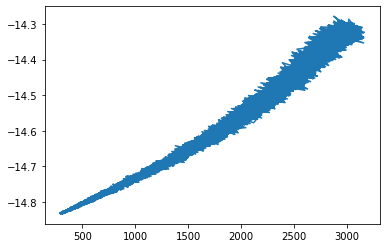

In [10]:
plt.plot(v, w/1080, label='Glass')

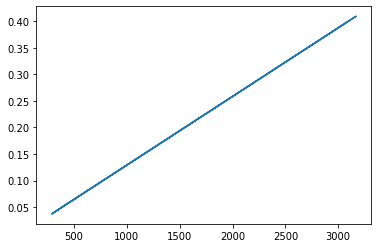

In [11]:
plt.plot(v, x/1080 - w/1080, label='Glass')

In [12]:
# Desnity of glass vs crystal
# Density 
diff_1 = [3.191, 3.244, 3.21] 
err_1 = [0.005, 0.002, 0.002]
diff_2 = [3.321, 3.331, 3.21]
err_2 = [0.006, 0.003, 0.002]
diff_3 = [3.25, 3.25, 3.27]
expt = [3.20, 3.18, 3.10]
err_ex = [0.005, 0.004, 0.004]

In [26]:
# print difference in density between glass and crystal for each composition

print(np.abs(diff_1[0]-diff_2[0]))
print(np.abs(diff_1[1]-diff_2[1]))
print(np.abs(diff_1[2]-diff_2[2]))


0.13000000000000034
0.08699999999999974
0.0


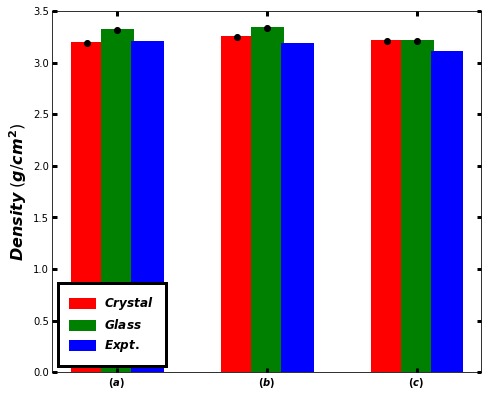

In [13]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(7, 6))
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([0, 5.3])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

# set height of bar
IT = diff_1     #
ECE = diff_2    #
CSE = expt
SSE = diff_3
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
#br4 = [x + barWidth for x in br3]
#br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,edgecolor ='r', label ='$Crystal$')
plt.errorbar(br1, IT, yerr=err_1, fmt="o", color="black")
plt.bar(br2, ECE, color ='g', width = barWidth,edgecolor ='g', label ='$Glass$')
plt.errorbar(br2, ECE, yerr=err_2, fmt="o", color="black")
plt.bar(br3, CSE, color ='b', width = barWidth,edgecolor ='b', label ='$Expt.$')
#plt.errorbar(br3, CSE, yerr=err_ex, fmt="o", color="black")
#plt.bar(br4, SSE, color ='royalblue', width = barWidth,edgecolor ='royalblue', label ='$Theo.$', alpha=0.75)
#plt.errorbar(br2, ECE, yerr=err_1, fmt="o", color="black")
#plt.bar(br2, tot_act, color ='c', width = barWidth,edgecolor ='c', label ='$D_{tot}$')

# Adding Xticks
plt.xlabel(' ', fontweight ='bold', fontsize = 15)
plt.ylabel('$Density$ ($g$/$cm^2$)', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(ECE))],
        ['$(a)$', '$(b)$', '$(c)$'],rotation=0)#, '$Tilt_{manual}$', '$Twist_{small}$', '$Twist_{large}$'],rotation=45)
 
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", loc='best',fontsize=12)
plt.savefig('density_random_crystal_lisette.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show() 

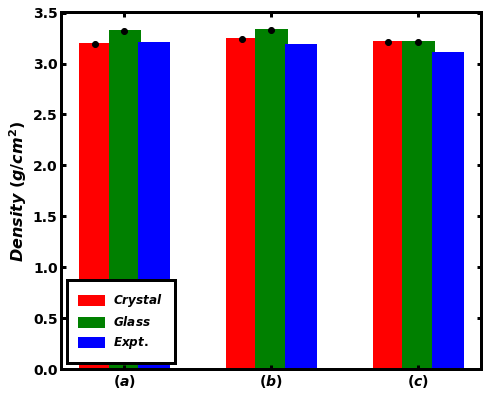

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(7, 6))
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([0, 5.3])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

# set height of bar
IT = diff_1     #
ECE = diff_2    #
CSE = expt
SSE = diff_3
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
#br4 = [x + barWidth for x in br3]
#br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,edgecolor ='r', label ='$Crystal$')
plt.errorbar(br1, IT, yerr=err_1, fmt="o", color="black")
plt.bar(br2, ECE, color ='g', width = barWidth,edgecolor ='g', label ='$Glass$')
plt.errorbar(br2, ECE, yerr=err_2, fmt="o", color="black")
plt.bar(br3, CSE, color ='b', width = barWidth,edgecolor ='b', label ='$Expt.$')
#plt.errorbar(br3, CSE, yerr=err_ex, fmt="o", color="black")
#plt.bar(br4, SSE, color ='royalblue', width = barWidth,edgecolor ='royalblue', label ='$Theo.$', alpha=0.75)
#plt.errorbar(br2, ECE, yerr=err_1, fmt="o", color="black")
#plt.bar(br2, tot_act, color ='c', width = barWidth,edgecolor ='c', label ='$D_{tot}$')

# Adding Xticks
plt.xlabel(' ', fontweight ='bold', fontsize = 15)
plt.ylabel('$Density$ ($g$/$cm^2$)', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(ECE))],
        ['$(a)$', '$(b)$', '$(c)$'],rotation=0)#, '$Tilt_{manual}$', '$Twist_{small}$', '$Twist_{large}$'],rotation=45)
 
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", loc='best',fontsize=12)
plt.savefig('density_random_crystal_lisette_2.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show() 

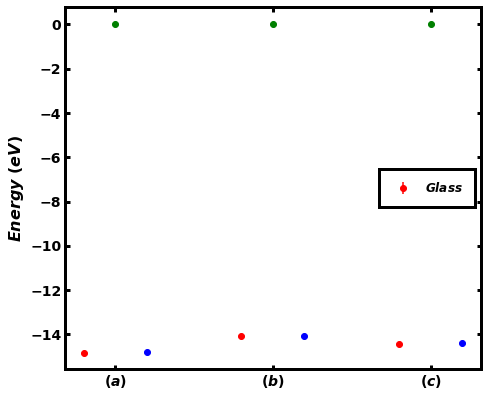

In [15]:
# Ordered, hena-1, hena-2
pot_en_g = [-14.832, -14.096, -14.42]  # Only pottial energy is different, 
pot_en_c = [-14.94, -14.20, -14.34]    # 
kin_en_g = [0.0385, 0.03880, 0.03880]  # 
kin_en_c = [0.03855, 0.03879, 0.03882] # Avg thermal energy = 0.03872 eV, it seems to be the same for both glass and crystal
tot_en_g = [-14.7939,-14.057, -14.381]
tot_en_c = [-14.90115, -14.168, -14.300]

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(7, 6))
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.figsize"] = (7,7)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
#plt.xlim([0, 10])
#plt.ylim([0, 5.3])
plt.tick_params(bottom=True, top=True, left=True, right=True)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["patch.linewidth"] = 3
plt.tick_params(which='both', axis="y",direction="in")
plt.tick_params(which='both', axis="x",direction="in")
plt.tick_params(width=3, length=4.5)

# set height of bar
IT = pot_en_g     #
ECE = kin_en_g    #
CSE = tot_en_g
#SSE = diff_3
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
#br4 = [x + barWidth for x in br3]
#br4 = [x + barWidth for x in br3]
 
# Make the plot
#plt.scatter(br1, IT, color ='r', width = barWidth,edgecolor ='r', label ='$Crystal$')
plt.errorbar(br1, IT, yerr=err_1, fmt="o", color="r", label ='$Glass$')
#plt.bar(br2, ECE, color ='g', width = barWidth,edgecolor ='g', label ='$Glass$')
plt.errorbar(br2, ECE, yerr=err_2, fmt="o", color="g")

#plt.bar(br3, CSE, color ='b', width = barWidth,edgecolor ='b', label ='$Expt.$')
plt.errorbar(br3, CSE, yerr=err_ex, fmt="o", color="b")
#plt.bar(br4, SSE, color ='royalblue', width = barWidth,edgecolor ='royalblue', label ='$Theo.$', alpha=0.75)
#plt.errorbar(br2, ECE, yerr=err_1, fmt="o", color="black")
#plt.bar(br2, tot_act, color ='c', width = barWidth,edgecolor ='c', label ='$D_{tot}$')

# Adding Xticks
plt.xlabel(' ', fontweight ='bold', fontsize = 15)
plt.ylabel('$Energy$ ($eV$)', fontsize = 16)
plt.xticks([r + barWidth for r in range(len(ECE))],
        ['$(a)$', '$(b)$', '$(c)$'],rotation=0)#, '$Tilt_{manual}$', '$Twist_{small}$', '$Twist_{large}$'],rotation=45)
 
plt.legend(fancybox=False, framealpha=1, shadow=False, borderpad=1, frameon=True, edgecolor="black", loc='best',fontsize=12)
#plt.savefig('density_random_crystal_lisette.png', bbox_inches='tight', dpi=600, transparent=False)
plt.show() 

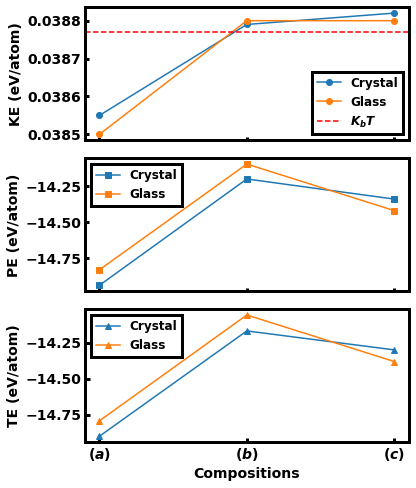

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Dummy data for kinetic energy (KE), potential energy (PE), and total energy (TE)
KE = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
PE = [[3, 2, 1], [4, 3, 2], [5, 4, 3]]
TE = [[4, 4, 4], [6, 6, 6], [8, 8, 8]]

# Labels for the x-axis
x_labels = ['($a$)', '($b$)', '($c$)']
x_values = range(len(x_labels))

# Create the subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 7))

# Set ticks inside
plt.tick_params(which='both', axis="y", direction="in", width=3, length=4.5)
plt.tick_params(which='both', axis="x", direction="in", width=3, length=4.5)

# Plot the data for each energy term on its respective subplot
ax1.plot(x_values, kin_en_c, label='Crystal', marker='o')
ax1.plot(x_values, kin_en_g, label='Glass', marker='o')

#fmt = '%.3f' # 3 decimal places
#yticks = mtick.FormatStrFormatter(fmt)
#ax1.yaxis.set_major_formatter(yticks)
ax1.axhline(y=0.03877, linestyle='--', color='r', label='$K_bT$')
ax1.set_ylabel('KE (eV/atom)', fontweight='bold')
ax1.tick_params(direction='in')
ax1.tick_params(axis='both', which='major', width=3)
ax1.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

ax2.plot(x_values, pot_en_c, label='Crystal', marker='s')
ax2.plot(x_values, pot_en_g, label='Glass', marker='s')
ax2.set_ylabel('PE (eV/atom)', fontweight='bold')
ax2.tick_params(direction='in')
ax2.tick_params(axis='both', which='major', width=3)
ax2.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

ax3.plot(x_values, tot_en_c, label='Crystal', marker='^')
ax3.plot(x_values, tot_en_g, label='Glass', marker='^')
ax3.set_xlabel('Compositions', fontweight='bold')
ax3.set_ylabel('TE (eV/atom)', fontweight='bold')
ax3.tick_params(direction='in')
ax3.tick_params(axis='both', which='major', width=3)
ax3.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)


# Set the x-axis labels and tick locations
plt.xticks(x_values, x_labels)


# Set the title
#plt.suptitle('Comparison of KE, PE, and TE for Three Compositions', fontweight='bold')
plt.savefig('energetics_glass_vs_crystal.png', bbox_inches='tight', dpi=600, transparent=False)
# Display the plot
plt.show()


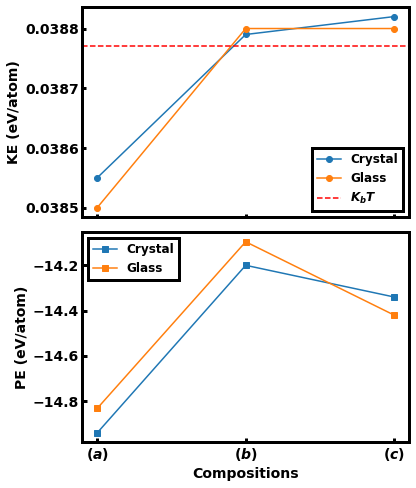

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Dummy data for kinetic energy (KE), potential energy (PE), and total energy (TE)
KE = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
PE = [[3, 2, 1], [4, 3, 2], [5, 4, 3]]
TE = [[4, 4, 4], [6, 6, 6], [8, 8, 8]]

# Labels for the x-axis
x_labels = ['($a$)', '($b$)', '($c$)']
x_values = range(len(x_labels))

# Create the subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 7))

# Set ticks inside
plt.tick_params(which='both', axis="y", direction="in", width=3, length=4.5)
plt.tick_params(which='both', axis="x", direction="in", width=3, length=4.5)

# Plot the data for each energy term on its respective subplot
ax1.plot(x_values, kin_en_c, label='Crystal', marker='o')
ax1.plot(x_values, kin_en_g, label='Glass', marker='o')

#fmt = '%.3f' # 3 decimal places
#yticks = mtick.FormatStrFormatter(fmt)
#ax1.yaxis.set_major_formatter(yticks)
ax1.axhline(y=0.03877, linestyle='--', color='r', label='$K_bT$')
ax1.set_ylabel('KE (eV/atom)', fontweight='bold')
ax1.tick_params(direction='in')
ax1.tick_params(axis='both', which='major', width=3)
ax1.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

ax2.plot(x_values, pot_en_c, label='Crystal', marker='s')
ax2.plot(x_values, pot_en_g, label='Glass', marker='s')
ax2.set_ylabel('PE (eV/atom)', fontweight='bold')
ax2.tick_params(direction='in')
ax2.tick_params(axis='both', which='major', width=3)
ax2.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

#ax3.plot(x_values, tot_en_c, label='Crystal', marker='^')
#ax3.plot(x_values, tot_en_g, label='Glass', marker='^')
ax2.set_xlabel('Compositions', fontweight='bold')
#ax2.set_ylabel('TE (eV/atom)', fontweight='bold')
#ax3.tick_params(direction='in')
#ax3.tick_params(axis='both', which='major', width=3)
#ax3.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)


# Set the x-axis labels and tick locations
plt.xticks(x_values, x_labels)


# Set the title
#plt.suptitle('Comparison of KE, PE, and TE for Three Compositions', fontweight='bold')
plt.savefig('energetics_glass_vs_crystal_2.png', bbox_inches='tight', dpi=600, transparent=False)
# Display the plot
plt.show()


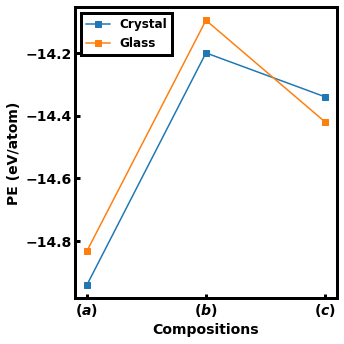

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Dummy data for kinetic energy (KE), potential energy (PE), and total energy (TE)
KE = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
PE = [[3, 2, 1], [4, 3, 2], [5, 4, 3]]
TE = [[4, 4, 4], [6, 6, 6], [8, 8, 8]]

# Labels for the x-axis
x_labels = ['($a$)', '($b$)', '($c$)']
x_values = range(len(x_labels))

# Create the subplots
fig, (ax2) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5, 5))

# Set ticks inside
plt.tick_params(which='both', axis="y", direction="in", width=3, length=4.5)
plt.tick_params(which='both', axis="x", direction="in", width=3, length=4.5)

# Plot the data for each energy term on its respective subplot
#ax1.plot(x_values, kin_en_c, label='Crystal', marker='o')
#ax1.plot(x_values, kin_en_g, label='Glass', marker='o')

#fmt = '%.3f' # 3 decimal places
#yticks = mtick.FormatStrFormatter(fmt)
#ax1.yaxis.set_major_formatter(yticks)
#ax1.axhline(y=0.03877, linestyle='--', color='r', label='$K_bT$')
#ax1.set_ylabel('KE (eV/atom)', fontweight='bold')
#ax1.tick_params(direction='in')
#ax1.tick_params(axis='both', which='major', width=3)
#ax1.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

ax2.plot(x_values, pot_en_c, label='Crystal', marker='s')
ax2.plot(x_values, pot_en_g, label='Glass', marker='s')
ax2.set_ylabel('PE (eV/atom)', fontweight='bold')
ax2.tick_params(direction='in')
ax2.tick_params(axis='both', which='major', width=3)
ax2.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

#ax3.plot(x_values, tot_en_c, label='Crystal', marker='^')
#ax3.plot(x_values, tot_en_g, label='Glass', marker='^')
ax2.set_xlabel('Compositions', fontweight='bold')
#ax2.set_ylabel('TE (eV/atom)', fontweight='bold')
#ax3.tick_params(direction='in')
#ax3.tick_params(axis='both', which='major', width=3)
#ax3.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)


# Set the x-axis labels and tick locations
plt.xticks(x_values, x_labels)


# Set the title
#plt.suptitle('Comparison of KE, PE, and TE for Three Compositions', fontweight='bold')
plt.savefig('energetics_glass_vs_crystal_2.png', bbox_inches='tight', dpi=600, transparent=False)
# Display the plot
plt.show()


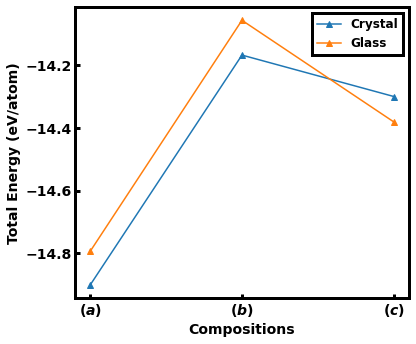

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

# Dummy data for kinetic energy (KE), potential energy (PE), and total energy (TE)
KE = [[1, 2, 3], [2, 3, 4], [3, 4, 5]]
PE = [[3, 2, 1], [4, 3, 2], [5, 4, 3]]
TE = [[4, 4, 4], [6, 6, 6], [8, 8, 8]]

# Labels for the x-axis
x_labels = ['($a$)', '($b$)', '($c$)']
x_values = range(len(x_labels))

# Create the subplots
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,5))

# Set ticks inside
plt.tick_params(which='both', axis="y", direction="in", width=3, length=4.5)
plt.tick_params(which='both', axis="x", direction="in", width=3, length=4.5)

# Plot the data for each energy term on its respective subplot
ax1.plot(x_values, kin_en_c, label='Crystal', marker='o')
ax1.plot(x_values, kin_en_g, label='Glass', marker='o')

#fmt = '%.3f' # 3 decimal places
#yticks = mtick.FormatStrFormatter(fmt)
#ax1.yaxis.set_major_formatter(yticks)
#ax1.axhline(y=0.03877, linestyle='--', color='r', label='$K_bT$')
#ax1.set_ylabel('KE (eV/atom)', fontweight='bold')
#ax1.tick_params(direction='in')
#ax1.tick_params(axis='both', which='major', width=3)
#ax1.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

#ax2.plot(x_values, pot_en_c, label='Crystal', marker='s')
#ax2.plot(x_values, pot_en_g, label='Glass', marker='s')
#ax2.set_ylabel('PE (eV/atom)', fontweight='bold')
#ax2.tick_params(direction='in')
#ax2.tick_params(axis='both', which='major', width=3)
#ax2.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)

ax3.plot(x_values, tot_en_c, label='Crystal', marker='^')
ax3.plot(x_values, tot_en_g, label='Glass', marker='^')
ax3.set_xlabel('Compositions', fontweight='bold')
ax3.set_ylabel('Total Energy (eV/atom)', fontweight='bold')
ax3.tick_params(direction='in')
ax3.tick_params(axis='both', which='major', width=3)
ax3.legend(loc='best', fontsize=12, fancybox=False, framealpha=1, edgecolor='black', frameon=True)


# Set the x-axis labels and tick locations
plt.xticks(x_values, x_labels)


# Set the title
#plt.suptitle('Comparison of KE, PE, and TE for Three Compositions', fontweight='bold')
plt.savefig('total_energy_300_various_compo_nasicon.png', bbox_inches='tight', dpi=600, transparent=False)
# Display the plot
plt.show()

In [25]:
# print difference in total energy for each composition

print('Total energy difference between glass and crystal for 0.5 Na: ', np.abs(tot_en_g[0]-tot_en_c[0]))
print('Total energy difference between glass and crystal for 0.75 Na: ', np.abs(tot_en_g[1]-tot_en_c[1]))
print('Total energy difference between glass and crystal for 1.0 Na: ', np.abs(tot_en_g[2]-tot_en_c[2]))

Total energy difference between glass and crystal for 0.5 Na:  0.10724999999999874
Total energy difference between glass and crystal for 0.75 Na:  0.11099999999999888
Total energy difference between glass and crystal for 1.0 Na:  0.08099999999999952


In [ ]:
# print difference in density for each composition
print('Density difference between glass and crystal for 0.5 Na: ', np.abs(diff_1[0]-density_c[0]))
print('Density difference between glass and crystal for 0.75 Na: ', np.abs(density_g[1]-density_c[1]))
print('Density difference between glass and crystal for 1.0 Na: ', np.abs(density_g[2]-density_c[2]))